## ADMN5015 Project1 (Marketing - Regression)
### Yali Liu


### Parse the product information by using BeautifulSoup.

In [ ]:
def url_function(date):

    url = 'https://admn5015-340805.uc.r.appspot.com/'    
    print(url + date + ".html")

In [ ]:
year = [2019,2020,2021, 2022]
month = [*range(1, 13, 1)]
day = [*range(1, 32, 1)]
full_date = []

for x in year:
    for y in month:
        if y == 2:
            for z in day:
                if len(str(y)) == 1:
                    if len(str(z)) ==1:
                        date = str(x) + "-0" + str(y) + "-0" + str(z)
                        full_date.append(date)
                    else:
                        date = str(x) + "-0" + str(y) + "-" + str(z)
                        full_date.append(date)
                else:
                    if len(str(z)) == 1:
                        date = str(x) + "-" + str(y) + "-0" + str(z)
                        full_date.append(date)
                    else:
                        date = str(x) + "-" + str(y) + "-" + str(z)
                        full_date.append(date)
                if x == 2020:
                    if z == 29:
                        break
                elif z == 28:
                    break
        elif y == 4 or y == 6 or y == 9 or y == 11:
            for z in day:
                if len(str(y)) == 1:
                    if len(str(z)) ==1:
                        date = str(x) + "-0" + str(y) + "-0" + str(z)
                        full_date.append(date)
                    else:
                        date = str(x) + "-0" + str(y) + "-" + str(z)
                        full_date.append(date)
                else:
                    if len(str(z)) == 1:
                        date = str(x) + "-" + str(y) + "-0" + str(z)
                        full_date.append(date)
                    else:
                        date = str(x) + "-" + str(y) + "-" + str(z)
                        full_date.append(date)
                if z == 30:
                    break
        else:
            for z in day:
                if len(str(y)) == 1:
                    if len(str(z)) ==1:
                        date = str(x) + "-0" + str(y) + "-0" + str(z)
                        full_date.append(date)
                    else:
                        date = str(x) + "-0" + str(y) + "-" + str(z)
                        full_date.append(date)
                else:
                    if len(str(z)) == 1:
                        date = str(x) + "-" + str(y) + "-0" + str(z)
                        full_date.append(date)
                    else:
                        date = str(x) + "-" + str(y) + "-" + str(z)
                        full_date.append(date)

In [ ]:
url_start = 'https://admn5015-340805.uc.r.appspot.com/'    
final_url = []

for a in full_date:
    final_url.append(url_start + a + ".html")

In [ ]:
from bs4 import BeautifulSoup
from lxml import etree
import urllib.request as urllib2

web_date=[]
web_price=[]
web_likes=[]
web_dislikes=[]
web_followers = []

# Initialize parser
parser = etree.HTMLParser()

for x in range(len(final_url)):
    webpage = urllib2.urlopen(final_url[x], timeout=10)
    html = webpage.read().decode(encoding="utf-8")
    soup = BeautifulSoup(html, "html.parser")
    web_date.append(soup.find("td", {"id": "date"}).text)
    web_price.append(soup.find("td", {"id": "price"}).text)
    web_likes.append(soup.find("td", {"id": "likes"}).text)
    web_dislikes.append(soup.find("td", {"id": "dislikes"}).text)
    web_followers.append(soup.find("td", {"id": "followers"}).text)

In [ ]:
import csv  

header = ['date', 'price', 'likes', 'dislikes', 'followers']


with open('products.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    for x in range(len(final_url)):
        data = [web_date[x], web_price[x], web_likes[x], web_dislikes[x], web_followers[x]]
        writer.writerow(data)

###  Upload the csv file to my GitHub profile and use the raw data link to do the Regression analysis.

In [ ]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Load data
df = pd.read_csv("https://raw.githubusercontent.com/Yali20212021/ADMN5015-Project1-Yali/main/products.csv")
df.head()

,Date,Price,Likes,Dislikes,Followers
0,2019-01-01,999.47,9001,401,15002
1,2019-01-02,998.94,9002,402,15004
2,2019-01-03,998.41,9003,403,15006
3,2019-01-04,997.88,9004,404,15008
4,2019-01-05,997.35,9005,405,15010


In [ ]:
df.tail()

,Date,Price,Likes,Dislikes,Followers
1456,2022-12-27,22452.8,10924,1496,17468
1457,2022-12-28,22452.8,10924,1496,17468
1458,2022-12-29,22452.8,10924,1496,17468
1459,2022-12-30,22452.8,10924,1496,17468
1460,2022-12-31,22452.8,10924,1496,17468


In [ ]:
# Examine data 
#.T to transpose
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1461.0,11167.313854,8574.937328,855.31,1362.78,14193.74,22452.8,22452.8
Likes,1461.0,10125.540041,662.219848,9001.00,9642.00,10283.00,10924.0,10924.0
Dislikes,1461.0,1085.281314,362.438436,401.00,766.00,1131.00,1496.0,1496.0
Followers,1461.0,16517.315537,824.037689,15002.00,15824.00,16646.00,17468.0,17468.0


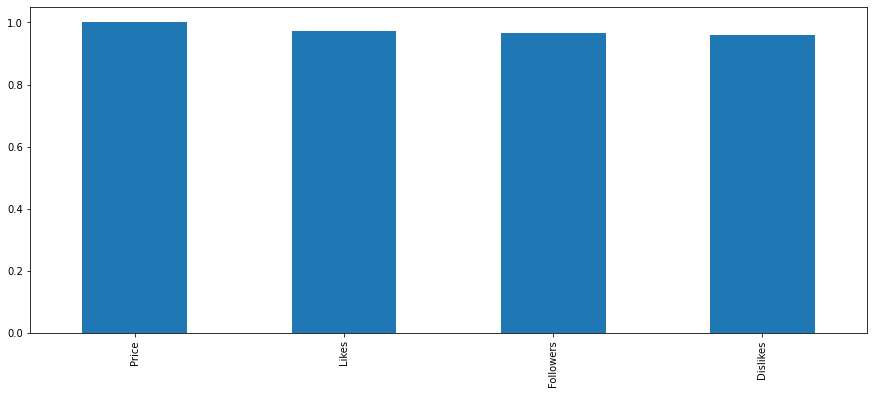

In [ ]:
# Plot data
plt.figure(figsize=(15,6))
bars = df.corr()['Price'].sort_values(ascending=False).plot(kind='bar')

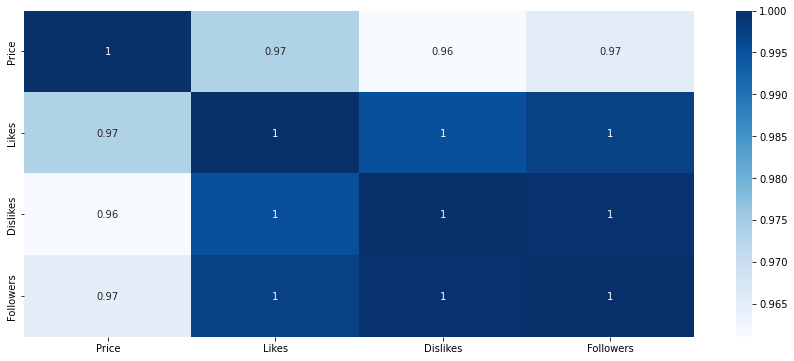

In [ ]:
# Create a heatmap
plt.figure(figsize=(15,6))
heatmap = sns.heatmap(df.corr(), annot=True, cmap="Blues")

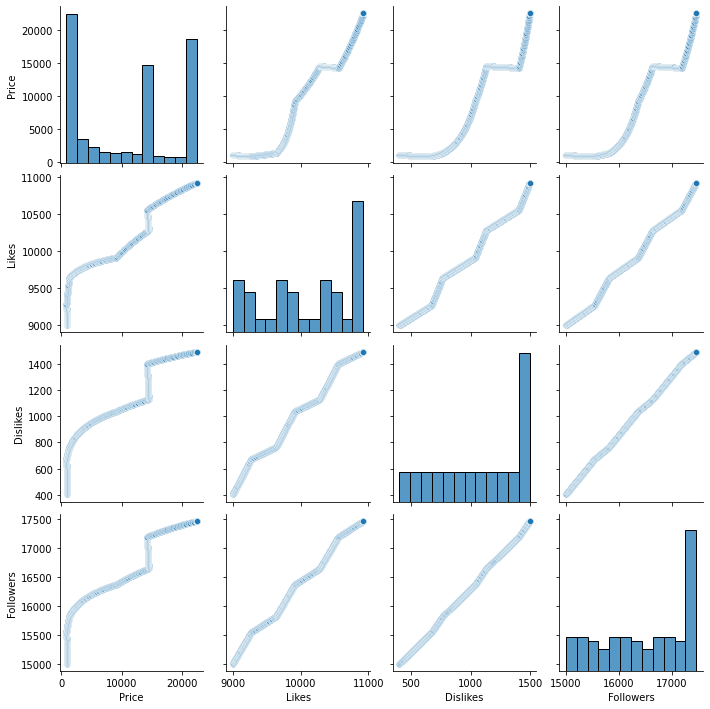

In [ ]:
sns.pairplot(df)

In [ ]:
# Create traning and testing datasets
x = df[['Likes', 'Dislikes', 'Followers']]
y = df['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
# Identify the best model
regressors = {

    "XGBRegressor": XGBRegressor(silent=True),

    "RandomForestRegressor": RandomForestRegressor(),

    "DecisionTreeRegressor": DecisionTreeRegressor(),

    "GaussianProcessRegressor": GaussianProcessRegressor(),

    "SVR": SVR(),

    "NuSVR": NuSVR(),

    "Ridge":Ridge(),

    "Lars": Lars(),

    "TheilSenRegressor": TheilSenRegressor(),

    "HuberRegressor": HuberRegressor(),

    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),

    "ARDRegression": ARDRegression(),

    "BayesianRidge": BayesianRidge(),

    "ElasticNet": ElasticNet(),

    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(),

}

In [ ]:
df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse'])
for key in regressors:
    print('*',key)
    start_time = time.time()
    regressor = regressors[key]
    model = regressor.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores = cross_val_score(model,
                             x_train,
                             y_train,
                             scoring="neg_mean_squared_error",
                             cv=10)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': round(np.sqrt(mean_squared_error(y_test, y_pred)))
    }
    df_models = df_models.append(row, ignore_index=True)

* XGBRegressor
* RandomForestRegressor
* DecisionTreeRegressor
* GaussianProcessRegressor
* SVR
* NuSVR
* Ridge
* Lars
* TheilSenRegressor


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline i

* HuberRegressor
* PassiveAggressiveRegressor
* ARDRegression
* BayesianRidge
* ElasticNet
* OrthogonalMatchingPursuit


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.629e+09, tolerance: 7.442e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.442e+09, tolerance: 6.756e+06
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

In [ ]:
# Order model results
df_models.head(20).sort_values(by='rmse', ascending=True)

,model,run_time,rmse
1,RandomForestRegressor,0.03,20
2,DecisionTreeRegressor,0.0,34
0,XGBRegressor,0.01,50
6,Ridge,0.0,1867
7,Lars,0.0,1867
11,ARDRegression,0.0,1867
12,BayesianRidge,0.0,1867
13,ElasticNet,0.0,1867
8,TheilSenRegressor,0.07,1881
14,OrthogonalMatchingPursuit,0.0,2035


I choose RandomForestRegressor Model for this analysis becuase it has the lowest RMSE. This is because a low RMSE value shows that the predicted data and the real data are close to each other and this reflects a better accuracy. The lower the RMSE is, the better the model performs. The RMSE is a great measure for evaluating the performance of a model because RMSE is proportional to the observed mean.

In [ ]:
# Evaluate the best model
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x, y)  

RandomForestRegressor(random_state=0)

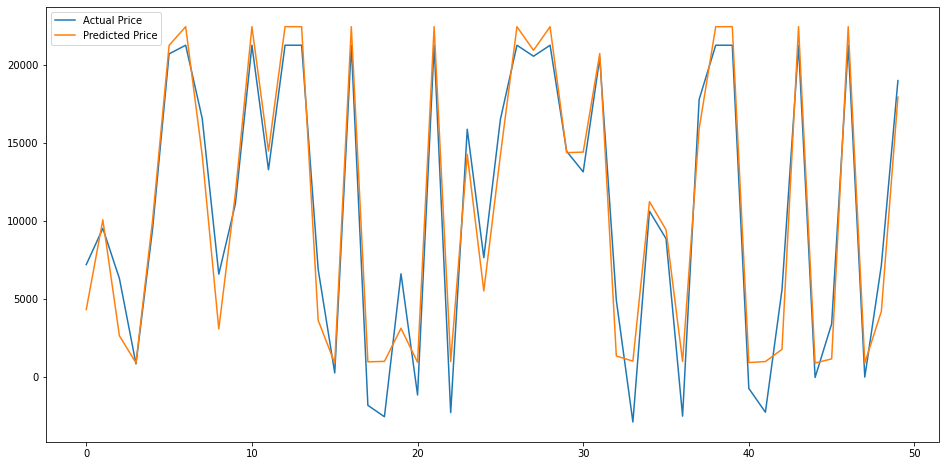

In [ ]:
# Plot
test = pd.DataFrame({'Predicted Price':y_pred, 'Actual Price':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual Price','Predicted Price'])

In [ ]:
# Predict the Price for January 1st, 2023
temp_data =     {'Likes' : [10924],
                'Dislikes' : [1496],
                'Followers' : [17468]
        }
df_price_input = pd.DataFrame(temp_data, columns = ['Likes', 'Dislikes', 'Followers'])
df_price_prediction_result = model.predict(df_price_input)
df_price_prediction_result

array([21263.49867895])